### EDA on streaming services
Description in readme.md file

### Importing packages

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

###  Loading data
Dataset has 8 columns:
<ul>
<li> ID - movies identificator</li>
<li> Title of the movie</li>
<li> Year of release</li>
<li>Age Category shows target group of movies:
<ul>
<li> 0 - Movie for all </li>
<li> 7 - Movie for childrens 7+ </li>
<li> 13 - Movie for teenagers 13+ </li>
<li> 18 - Movie for adults 18+ </li> </ul>
 </li> 
<li>Reviews on Rotten Tomatoes from 0 to 100 </li>
<li> Avability on Netflix, Hulu, Disney+, Amazon Prime Video</li>

</ul>

In [98]:
dataset = pd.read_csv("streaming_services_data.csv") # read the csv file
dataset.drop(["Unnamed: 0", "Type","ID"], axis=1, inplace=True) # delete unnecessary columns
print(dataset.head(4)) # print first 4 rows of the dataset
print(dataset.info()) # print information about the dataset



                                      Title  Year  Age Rotten Tomatoes  \
0                              The Irishman  2019  18+          98/100   
1                                    Dangal  2016   7+          97/100   
2  David Attenborough: A Life on Our Planet  2020   7+          95/100   
3         Lagaan: Once Upon a Time in India  2001   7+          94/100   

   Netflix  Hulu  Prime Video  Disney+  
0        1     0            0        0  
1        1     0            0        0  
2        1     0            0        0  
3        1     0            0        0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            9515 non-null   object
 1   Year             9515 non-null   int64 
 2   Age              5338 non-null   object
 3   Rotten Tomatoes  9508 non-null   object
 4   Netflix          9515 non-null   int64 
 5 

### Null values
Almost all columns don't have null values, except Age column, there we have 4177 null values, which is 43.9 % percent of data in this column. Rest of columns have 0 null values.

In [99]:
print("Null values in the dataset:")
print(dataset.isna().sum()) # print the number of null values in the dataset
print("Percentage of null values in the dataset:", dataset.isna().sum()/len(dataset)*100)

Null values in the dataset:
Title                 0
Year                  0
Age                4177
Rotten Tomatoes       7
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
dtype: int64
Percentage of null values in the dataset: Title               0.000000
Year                0.000000
Age                43.899107
Rotten Tomatoes     0.073568
Netflix             0.000000
Hulu                0.000000
Prime Video         0.000000
Disney+             0.000000
dtype: float64


### Adding columns, transforming data
To make analyse easier I transformed ***Rotten Tomatoes*** column by striping value "/100" from each record and changed it to int. <br> Added new column ***streaming***, which stores informations about streaming services. This column contains str values (each analysed streaming service). <br>
Changed values in **Age** column to int values (described above).

In [131]:
dataset["Rotten Tomatoes"]=dataset["Rotten Tomatoes"].str.strip("/100") # remove  /100 sign from the Rotten Tomatoes column
dataset["Age"] = dataset["Age"].str.strip("+") # remove + sign from the Age column
dataset["Age"] = [ 0 if age_int == "all" else  age_int for age_int in dataset["Age"]] # convert the all values to 0 in the Age column
dataset["Age"].fillna(0, inplace=True) # fill the null values in the Age column with 0
dataset["Age"].astype(int) # convert the Age column to integer
# dataset.to_csv("streaming_services_data_cleaned.csv") # save the cleaned dataset to a csv file

### Min/max values, 1,2,3 quartiles

In [100]:
dataset.describe()

,Year,Netflix,Hulu,Prime Video,Disney+
count,9515.000000,9515.000000,9515.000000,9515.000000,9515.000000
mean,2007.422386,0.388334,0.110037,0.432265,0.096900
std,19.130367,0.487397,0.312952,0.495417,0.295837
min,1914.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.000000,0.000000,0.000000,0.000000,0.000000
75%,2018.000000,1.000000,0.000000,1.000000,0.000000
max,2021.000000,1.000000,1.000000,1.000000,1.000000


In [101]:
dataset

,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,The Irishman,2019,18+,98/100,1,0,0,0
1,Dangal,2016,7+,97/100,1,0,0,0
2,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0
3,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0
4,Roma,2018,18+,94/100,1,0,0,0
...,...,...,...,...,...,...,...,...
9510,Most Wanted Sharks,2020,NaN,14/100,0,0,0,1
9511,Doc McStuffins: The Doc Is In,2020,NaN,13/100,0,0,0,1
9512,Ultimate Viking Sword,2019,NaN,13/100,0,0,0,1
9513,Hunt for the Abominable Snowman,2011,NaN,10/100,0,0,0,1


In [102]:
films_each_year = dataset.groupby("Year").count()["ID"]
df_films_each_year = pd.DataFrame(films_each_year)
df_films_each_year.reset_index(inplace=True)
plt.figure()
sns.relplot(x="Year", y="ID", data=df_films_each_year, kind="scatter")
plt.show()

KeyError: 'ID'

<Figure size 432x288 with 0 Axes>

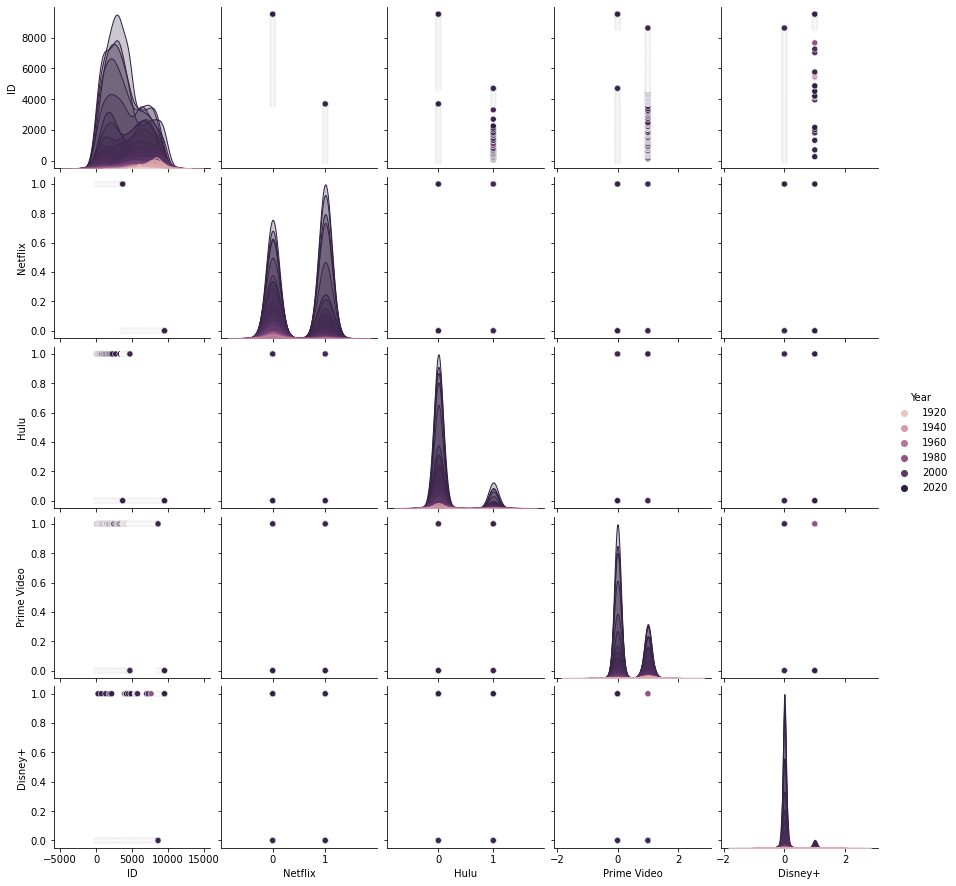

In [ ]:

plt.figure()
sns.pairplot(dataset, hue="Year")